# Exercise 02: SVD/PCA on MNIST Digits

In this exercise,
you'll explore the use of Singular Value Decomposition (SVD)
to perform Principle Component Analysis (PCA)
on the MNIST handwritten digits dataset.

As usual, let's start by installing the needed packages:

In [6]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

Now let's load the MNIST dataset:

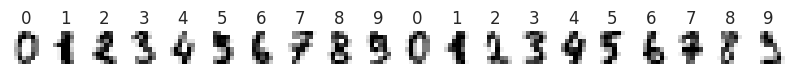

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
dataset = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

We have 1797 examples of 8x8 pixel images:

In [8]:
dataset.images.shape

(1797, 8, 8)

**How many dimensions does each image have?**

(Hint #1: The answer isn't 2.)

(Hint #2: How many numbers does it take to represent one image?)

YOUR ANSWER HERE.

there are 64 dimensions

We're going to "flatten" the 8x8 pixel images into 64 pixel vectors to aid our processing.
Note the transpose (`.T`); each image vector is now a column vector.

In [19]:
N_samples = len(dataset.images)
data = dataset.images.reshape((N_samples, 64)).T
data.shape

(64, 1797)

Let's take a compare the tranpose of the first data vector
(displayed as a row instead of a column)
to the first 8x8 dataset image.
Make sure you understand what you're looking at!

In [10]:
print('data[:,0]=\n{}'.format(data[:,0]))
print('dataset.images[0]=\n{}'.format(dataset.images[0]))

data[:,0]=
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
dataset.images[0]=
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


**Why do we need to normalize our data before performing SVD?**

YOUR ANSWER HERE.

We need to normalize the data because SVD needs to go through the origin and normalizing will allow that to happen in a better way.

Let's go ahead and normalize.  We need to keep the mean and stddev info for later use.

In [11]:
data_mean = np.mean(data, axis=1).reshape((64,1))
#print('data_mean = \n{}'.format(data_mean))

data_stddev = np.std(data, axis=1).reshape((64,1))
data_stddev[data_stddev == 0] = 0.001
#print('data_stddev = \n{}'.format(data_stddev))

data_normalized = (data - data_mean)/data_stddev

Inspect the following code and its output:

In [12]:
print(np.mean(data_normalized, axis=1))
print(np.std(data_normalized, axis=1))

[ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16 -3.16941798e-16 -9.59598443e-16  6.06946633e-16
 -4.62368967e-16  7.55084971e-17 -5.33796713e-17  5.71483749e-17
  4.52862258e-17 -1.49512505e-17  8.96580775e-16 -2.17719863e-16
 -6.87973761e-16 -7.70421876e-17  2.59978769e-16  2.32547550e-16
  1.05878949e-16 -1.40863021e-16 -1.15408826e-16 -2.26477465e-16
  4.51109193e-16  3.79341646e-17 -7.71657517e-17 -9.60092699e-17
 -8.72980041e-17 -1.50624582e-16 -1.05597840e-15 -2.52140175e-16
  0.00000000e+00  3.42148865e-16  1.21710593e-16 -1.07871419e-16
 -2.00606242e-16 -1.09354188e-17 -7.12964591e-17  0.00000000e+00
  3.00716294e-16 -1.74657790e-16  4.03436636e-16  1.92111213e-16
  2.61337974e-17  5.38739275e-17  4.71396866e-17  8.63759074e-16
  2.62048467e-16  3.33128689e-16  8.36528645e-17  1.98775949e-16
  4.61017485e-16  5.01670059e-17  4.71582212e-16 -4.92032063e-16
  2.25353805e-16  3.44125890e-16  5.95269830e-17 -6.11460582e-16
 -5.19092591e-16  1.69529

**Do these values make sense?  Why or why not?  Do you see anything unexpected?**

YOUR ANSWER HERE.

The normalization makes sense but in the std matrix there are some 0's where the mean is 0. 

Now that we have normalized data,
we can construct the covariance matrix.

**What shape do you expect the covariance matrix to have?  Why?**

YOUR ANSWER HERE.

64,64 because we dotted a 64x1 by a 1x64 which gives a 64x64. The 1x64 came from the transformation

In [13]:
C = np.dot(data_normalized,data_normalized.T)
C.shape

(64, 64)

Before you run the code below,
stop and think about what we're doing:
we want to reduce the dimensionality of the MNIST dataset
to something more "manageable".

**What is the minimum number of dimensions we can reasonably expect for this dataset?  Why?**

YOUR ANSWER HERE.

61 because there are 3 0's which are the lowest values we can eliminate

Let's perform SVD on the covariance matrix,
and inspect the diagonal, `S`, of the singular value matrix:

S = 
[1.31912178e+04 1.04805410e+04 9.25651427e+03 7.12335980e+03
 5.32755597e+03 4.61939178e+03 4.32119291e+03 3.71533769e+03
 3.28655993e+03 3.21397324e+03 3.04933169e+03 2.82489048e+03
 2.49411924e+03 2.44136762e+03 2.37345955e+03 2.09825201e+03
 1.94630145e+03 1.79560240e+03 1.74999174e+03 1.63240670e+03
 1.47760380e+03 1.39425301e+03 1.27795593e+03 1.15936047e+03
 1.06911208e+03 1.03539723e+03 9.46009867e+02 9.17102797e+02
 8.74407408e+02 8.18259523e+02 7.95361387e+02 7.58452350e+02
 7.16794919e+02 7.02417596e+02 6.48257522e+02 6.26091094e+02
 5.73994955e+02 5.28143022e+02 4.97353441e+02 4.63858315e+02
 4.45103194e+02 4.35272454e+02 3.90777264e+02 3.73560685e+02
 3.59363259e+02 3.40943955e+02 3.16327580e+02 3.03079236e+02
 2.84099795e+02 2.57033236e+02 2.39246620e+02 2.23177619e+02
 2.14314856e+02 2.00948239e+02 1.84097792e+02 1.76742134e+02
 1.61973032e+02 1.48112749e+02 1.37131681e+02 1.13668149e+02
 9.04724945e+01 9.83226354e-13 9.83226354e-13 9.83226354e-13]


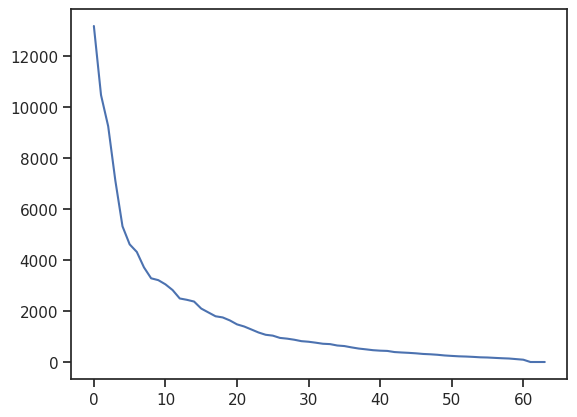

In [14]:
U,S,Vh = np.linalg.svd(C)
print('S = \n{}'.format(S))
plt.plot(S)
plt.show();

**Based on the values and scree plot above, how many meaningful dimensions does this MNIST data have?  How did you come to that conclusion?**

YOUR ANSWER HERE.

There seems to be around 20 useful dimensions based on the scree plot above. 20 seems like the point where the data gets less meaningfull

**Based on the values and scree plot above, how many dimensions can we *definitely* get rid of?**

YOUR ANSWER HERE.

we can def get rid of 3 dimensions because of the drop off past 60

**What do the dimensions we can eliminate say about the input data values?**

YOUR ANSWER HERE.

The dimensions we got rid of say that they are less correlated to the majority of the data and they can introduce noise into the dataset.

Below I've "inverted" the scree plot
to show the percentage of information retained
versus number of dimensions retained.

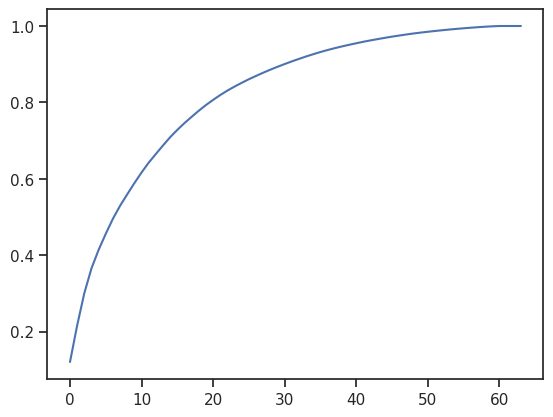

In [15]:
plt.plot(np.cumsum(S)/np.sum(S))
plt.show()

Let's retain only 5 dimensions and take a look at the results.

First, we'll project our data onto the best 5D approximation of our covariance matrix:

In [16]:
ND = 5

P = np.dot(np.diagflat(S[0:ND]), Vh[0:ND,:])
compressed_data = np.dot(P,data_normalized)
compressed_data.shape

(5, 1797)

**Explain the shape of `compressed_data` shown above.**

YOUR ANSWER HERE.

The shape above is a 5D matrix that has all the data in it

Our `compressed_data` currently lives in a 5D space with the basis determined by SVD.
We'd like to bring it back into our original image space and coordinate system.

Unfortunately, the matrix `P` is singular, so we can't invert it.
Instead, we'll use the "pseudo-inverse" as the next best thing:

In [17]:
UnP = np.linalg.pinv(P)
UnP.shape

(64, 5)

Now we'll use our "unpack" (`UnP`) matrix to bring our `compressed_data` back into the original input space.

Note that we need to undo the data normalization, because that wasn't accounted for by the SVD process.

In [20]:
unpacked_data = np.dot(UnP,compressed_data)*data_stddev + data_mean
unpacked_images = np.reshape(unpacked_data.T, (N_samples, 8, 8))
unpacked_images.shape

(1797, 8, 8)

Let's see how well 5 dimensions representated our data.

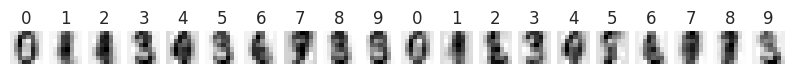

In [21]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
for ax, image, label in zip(axes, unpacked_images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

**What are your thoughts on these images?  Are 5 dimensions enough?  Why do some numbers appear reasonably clear while others are garbled?**

YOUR ANSWER HERE.

I think these images have lost too much detail to be enough. I think when the dimensions got reduced some of the detail was lost producing those garbled images.

Take a look at the first unpacked image values versus the original image values:

In [22]:
print('unpacked_images[0] =\n{}'.format(unpacked_images[0]))
print('dataset.images[0] = \n{}'.format(dataset.images[0]))

unpacked_images[0] =
[[-1.55194165e-19  1.97392904e-01  4.92301023e+00  1.22029804e+01
   1.27113042e+01  6.42071202e+00  1.50387052e+00  1.42352030e-01]
 [ 1.12160141e-03  1.84466751e+00  1.37315597e+01  1.13614650e+01
   7.43223111e+00  9.79719750e+00  2.22722810e+00  1.78567689e-01]
 [ 1.75079376e-03  4.43674263e+00  1.58683671e+01  2.82204343e+00
  -2.79853950e-01  1.00758063e+01  4.11641135e+00  1.15611160e-01]
 [ 1.03533860e-03  5.94830558e+00  1.51447913e+01  3.77790690e+00
   2.85352348e+00  1.13139090e+01  6.27220699e+00  7.86836483e-03]
 [ 0.00000000e+00  6.10506997e+00  1.14771439e+01  2.47900450e+00
   2.63989472e+00  1.35106141e+01  7.28597256e+00  0.00000000e+00]
 [ 3.12735336e-02  3.76240037e+00  9.86837147e+00  1.02203084e+00
   1.64412964e+00  1.31218491e+01  6.60175465e+00 -3.36505294e-02]
 [ 2.97590371e-02  1.19543696e+00  9.93991053e+00  6.26414666e+00
   7.76098005e+00  1.18165342e+01  2.41974816e+00 -5.03054929e-01]
 [ 1.50317767e-04  1.90996652e-01  5.21882992e+0

Let's try the same steps again, but this time we'll retain all 64 dimensions.

In [23]:
ND = 64

P = np.dot(np.diagflat(S[0:ND]), Vh[0:ND,:])
compressed_data = np.dot(P,data_normalized)
compressed_data.shape

(64, 1797)

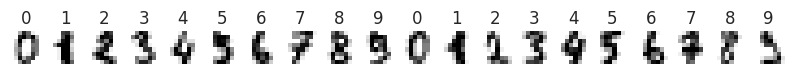

In [25]:
UnP = np.linalg.pinv(P)

unpacked_data = np.dot(UnP,compressed_data)*data_stddev + data_mean
unpacked_images = np.reshape(unpacked_data.T, (N_samples, 8, 8))

_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
for ax, image, label in zip(axes, unpacked_images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

For comparison, let's look at the original dataset images.

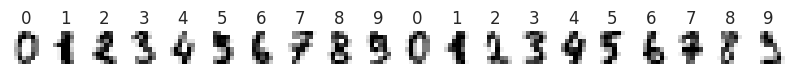

In [26]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

**What do you notice?  Why is that the case?**

YOUR ANSWER HERE.

The resolution is clearer

Let's compare the unpacked/original image values again:

In [27]:
print('unpacked_images[0] =\n{}'.format(unpacked_images[0]))
print('dataset.images[0] = \n{}'.format(dataset.images[0]))

unpacked_images[0] =
[[ 0.00000000e+00 -2.17603713e-14  5.00000000e+00  1.30000000e+01
   9.00000000e+00  1.00000000e+00 -2.22044605e-15  6.21724894e-15]
 [-6.07153217e-18  4.79616347e-14  1.30000000e+01  1.50000000e+01
   1.00000000e+01  1.50000000e+01  5.00000000e+00  1.12410081e-15]
 [-1.23599048e-16  3.00000000e+00  1.50000000e+01  2.00000000e+00
  -1.24344979e-14  1.10000000e+01  8.00000000e+00 -2.28983499e-16]
 [-3.29597460e-17  4.00000000e+00  1.20000000e+01  1.06581410e-14
  -1.95399252e-14  8.00000000e+00  8.00000000e+00 -1.08420217e-16]
 [-1.34623609e-19  5.00000000e+00  8.00000000e+00 -3.55271368e-15
   3.55271368e-15  9.00000000e+00  8.00000000e+00 -1.75535635e-20]
 [ 2.94902991e-16  4.00000000e+00  1.10000000e+01 -2.13162821e-14
   1.00000000e+00  1.20000000e+01  7.00000000e+00 -4.33680869e-16]
 [ 1.76941795e-16  2.00000000e+00  1.40000000e+01  5.00000000e+00
   1.00000000e+01  1.20000000e+01 -1.24344979e-14  3.05311332e-16]
 [-1.69135539e-17  2.04281037e-14  6.00000000e+0

**How well did 64 dimensions approximate our original dataset?  Why?**

YOUR ANSWER HERE.

It approzimated it pretty well because it has more detail

It would seem that there is some middle ground between 5D and 64D that would serve our purpose.  Let's try to find it. 

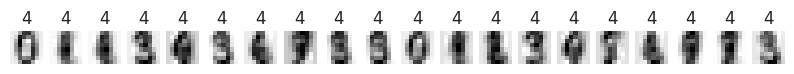

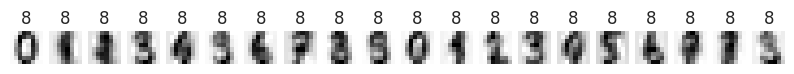

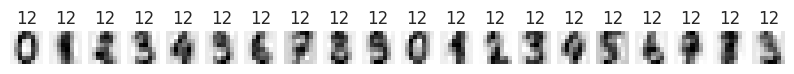

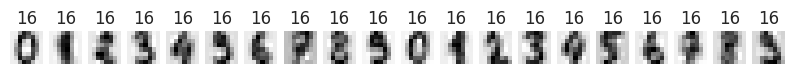

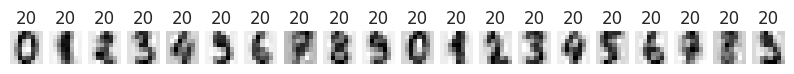

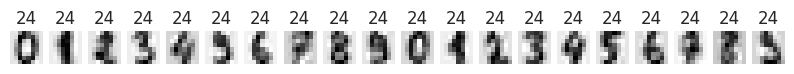

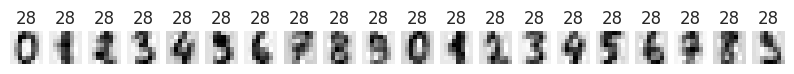

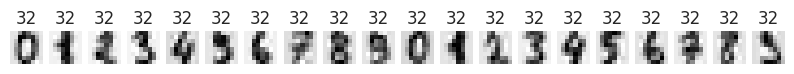

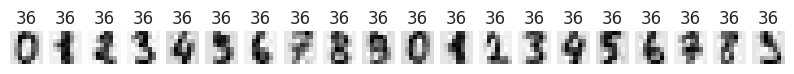

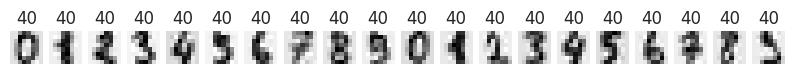

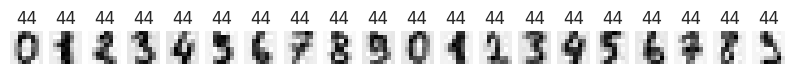

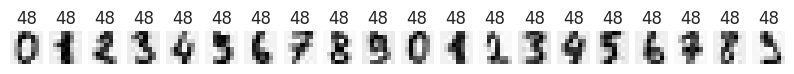

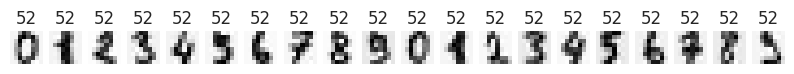

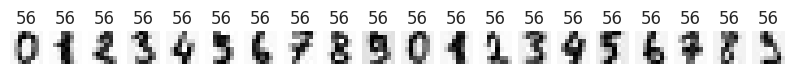

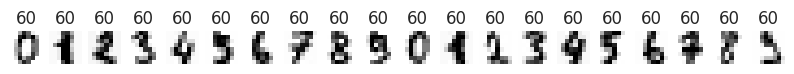

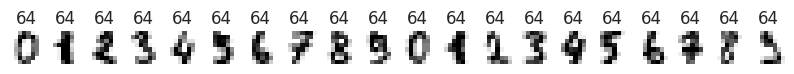

In [29]:
for ND in range(4,65,4):    
    P = np.dot(np.diagflat(S[0:ND]), Vh[0:ND,:])
    compressed_data = np.dot(P,data_normalized)
    UnP = np.linalg.pinv(P)

    unpacked_data = np.dot(UnP,compressed_data)*data_stddev + data_mean
    unpacked_images = np.reshape(unpacked_data.T, (N_samples, 8, 8))

    _, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
    for ax, image, label in zip(axes, unpacked_images, dataset.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("%i" % ND)

**Based on the above plots, how many dimensions would you retain?  How did you come to that conclusion?**

YOUR ANSWER HERE.

I think keeping 35 dimensions is enough because most of the detail is still there and i was able to understand all of the images.

**What did you think of this exercise?**

YOUR ANSWER HERE.

I enjoyed this exercise however i think adding some links to help elaborate some of the topics would be helpful.